In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Reading the dataset with pandas

In [87]:
df = pd.read_csv("C:/Users/Asus/datasets/KaggleV2-May-2016.csv")

In [88]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


df.info() for column dtypes

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Checking of nulls in the dataset

In [90]:
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [91]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [92]:
df['No-show'].value_counts()

No-show
No     88208
Yes    22319
Name: count, dtype: int64

Encoding show/no_show column 

In [93]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['No-show'] = le.fit_transform(df['No-show'])

In [94]:
df.head()
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

Dropping unnecessary columns

In [95]:
df = df.drop(['PatientId', 'AppointmentID'], axis=1)

In [96]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0


Set negative age values to nan then filling these nans with the median age value

In [97]:
df.loc[df['Age'] < 0, 'Age'] = np.nan
df['Age'] = df['Age'].fillna(df['Age'].median())


In [98]:
df[df['Age'] < 0]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [99]:
df['Scholarship'].unique()

array([0, 1])

In [100]:
df['SMS_received'].unique()


array([0, 1])

In [101]:
df[df['Handcap'] > 0] = 1

In [102]:
df['Handcap'].value_counts()

Handcap
0    108286
1      2241
Name: count, dtype: int64

Convert ScheduledDay and AppointmentDay columns to datetime 

In [103]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'], errors='coerce')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'], errors='coerce')

In [104]:
df['ScheduledDay']

0        2016-04-29 18:38:08+00:00
1        2016-04-29 16:08:27+00:00
2        2016-04-29 16:19:04+00:00
3        2016-04-29 17:29:31+00:00
4        2016-04-29 16:07:23+00:00
                    ...           
110522   2016-05-03 09:15:35+00:00
110523   2016-05-03 07:27:33+00:00
110524   2016-04-27 16:03:52+00:00
110525   2016-04-27 15:09:23+00:00
110526   2016-04-27 13:30:56+00:00
Name: ScheduledDay, Length: 110527, dtype: datetime64[ns, UTC]

In [105]:
df['AppointmentDay']

0        2016-04-29 00:00:00+00:00
1        2016-04-29 00:00:00+00:00
2        2016-04-29 00:00:00+00:00
3        2016-04-29 00:00:00+00:00
4        2016-04-29 00:00:00+00:00
                    ...           
110522   2016-06-07 00:00:00+00:00
110523   2016-06-07 00:00:00+00:00
110524   2016-06-07 00:00:00+00:00
110525   2016-06-07 00:00:00+00:00
110526   2016-06-07 00:00:00+00:00
Name: AppointmentDay, Length: 110527, dtype: datetime64[ns, UTC]

New 'DaysWaiting' feature with the help of already existing features 

In [106]:
df['DaysWaiting'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

In [107]:
df['DaysWaiting'].isna().sum()

np.int64(2241)

In [108]:
df.dropna(subset=['DaysWaiting'], inplace=True)

ADDING THE DAY OF THE APPOINTMENT FEATURE

In [109]:
df['AppointmentWeekday'] = df['AppointmentDay'].dt.day_of_week

In [110]:
df['Gender'].value_counts()

Gender
F    70550
M    37736
Name: count, dtype: int64

Mapping Females to value 1, Males to 0 

In [111]:
df.loc[df['Gender'] == 'F', 'Gender'] = 1
df.loc[df['Gender'] == 'M', 'Gender'] = 0

In [112]:
df['Gender'] = df['Gender'].astype(int)

In [113]:
df['Gender'].value_counts()

Gender
1    70550
0    37736
Name: count, dtype: int64

In [114]:
df.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood',
       'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap',
       'SMS_received', 'No-show', 'DaysWaiting', 'AppointmentWeekday'],
      dtype='object')

Encoding with get_dummies

In [115]:
df = pd.get_dummies(df, columns=['Neighbourhood'], dtype=int, drop_first=True)


In [116]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,...,Neighbourhood_SANTOS REIS,Neighbourhood_SEGURANÇA DO LAR,Neighbourhood_SOLON BORGES,Neighbourhood_SÃO BENEDITO,Neighbourhood_SÃO CRISTÓVÃO,Neighbourhood_SÃO JOSÉ,Neighbourhood_SÃO PEDRO,Neighbourhood_TABUAZEIRO,Neighbourhood_UNIVERSITÁRIO,Neighbourhood_VILA RUBIM
0,1,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56.0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Visualizations

([<matplotlib.axis.XTick at 0x1e902c4a410>,
 [Text(0, 0, 'Male'), Text(1, 0, 'Female')])

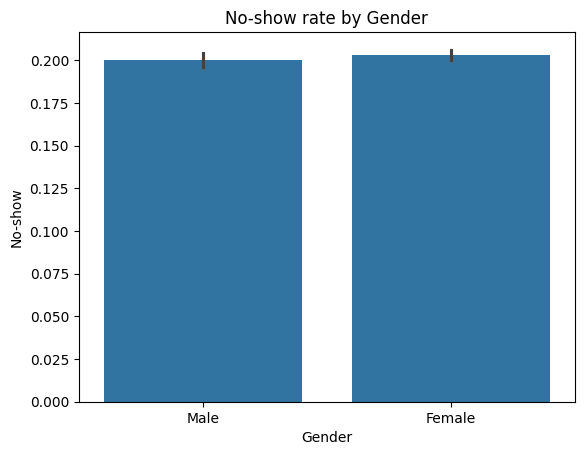

In [117]:
import seaborn as sns

sns.barplot(data=df, x='Gender', y='No-show')
plt.title('No-show rate by Gender')
plt.xticks([0,1], ['Male', 'Female'])

<Axes: xlabel='Age', ylabel='Count'>

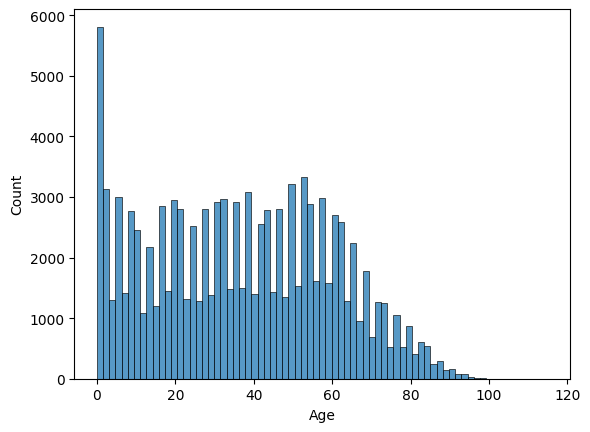

In [118]:
sns.histplot(df, x='Age')

Text(0.5, 1.0, 'No-shows per Weekday (0=Monday)')

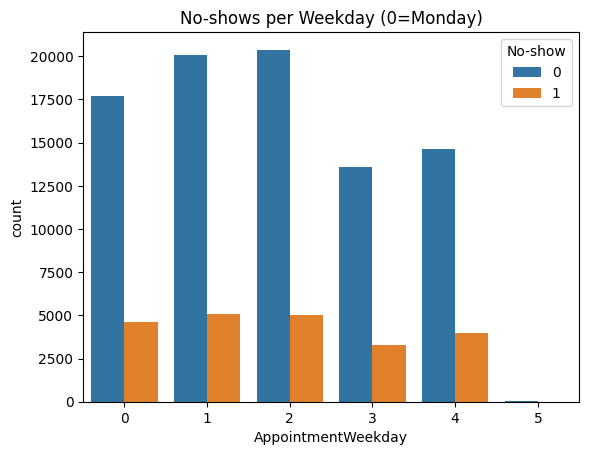

In [119]:
sns.countplot(x='AppointmentWeekday', hue='No-show', data=df)
plt.title('No-shows per Weekday (0=Monday)')

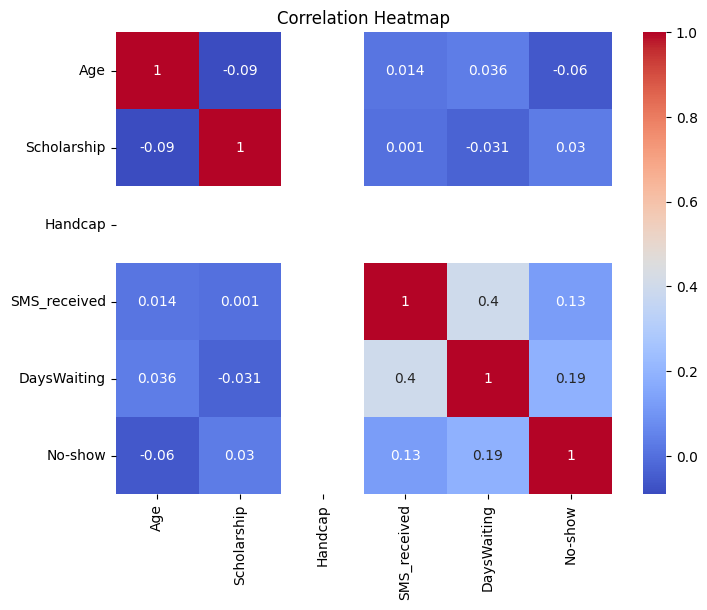

In [120]:
cols =  ['Age', 'Scholarship', 'Handcap', 'SMS_received', 'DaysWaiting', 'No-show']
plt.figure(figsize=(8,6))
sns.heatmap(df[cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [121]:
df = df.drop(['ScheduledDay', 'AppointmentDay'], axis=1)


In [122]:
df.columns

Index(['Gender', 'Age', 'Scholarship', 'Hipertension', 'Diabetes',
       'Alcoholism', 'Handcap', 'SMS_received', 'No-show', 'DaysWaiting',
       'AppointmentWeekday', 'Neighbourhood_ANDORINHAS',
       'Neighbourhood_ANTÔNIO HONÓRIO', 'Neighbourhood_ARIOVALDO FAVALESSA',
       'Neighbourhood_BARRO VERMELHO', 'Neighbourhood_BELA VISTA',
       'Neighbourhood_BENTO FERREIRA', 'Neighbourhood_BOA VISTA',
       'Neighbourhood_BONFIM', 'Neighbourhood_CARATOÍRA',
       'Neighbourhood_CENTRO', 'Neighbourhood_COMDUSA',
       'Neighbourhood_CONQUISTA', 'Neighbourhood_CONSOLAÇÃO',
       'Neighbourhood_CRUZAMENTO', 'Neighbourhood_DA PENHA',
       'Neighbourhood_DE LOURDES', 'Neighbourhood_DO CABRAL',
       'Neighbourhood_DO MOSCOSO', 'Neighbourhood_DO QUADRO',
       'Neighbourhood_ENSEADA DO SUÁ', 'Neighbourhood_ESTRELINHA',
       'Neighbourhood_FONTE GRANDE', 'Neighbourhood_FORTE SÃO JOÃO',
       'Neighbourhood_FRADINHOS', 'Neighbourhood_GOIABEIRAS',
       'Neighbourhood_GRANDE VITÓ

In [123]:
X = df.drop(['No-show','AppointmentWeekday'], axis=1)
y = df['No-show']

In [124]:
X.isnull().sum()

Gender                         0
Age                            0
Scholarship                    0
Hipertension                   0
Diabetes                       0
                              ..
Neighbourhood_SÃO JOSÉ         0
Neighbourhood_SÃO PEDRO        0
Neighbourhood_TABUAZEIRO       0
Neighbourhood_UNIVERSITÁRIO    0
Neighbourhood_VILA RUBIM       0
Length: 89, dtype: int64

Train/Test split

In [125]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
  X,y , random_state=104,test_size=0.2, shuffle=True)


Scaling the data

In [126]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns = ['Age', 'DaysWaiting']
df[columns] = scaler.fit_transform(df[columns])



### MODEL EVALUATION

KNN

In [127]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)



In [128]:

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7782805429864253


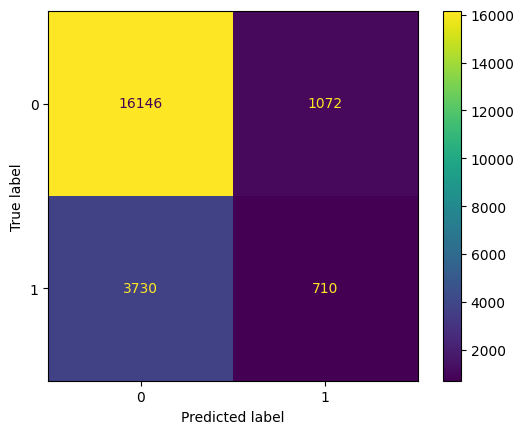

In [129]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


DECISION TREE

In [130]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

clf = DecisionTreeClassifier(random_state=1, max_depth=2)

clf.fit(X_train, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",2
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",1
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current nod

In [131]:
y_pred2 = clf.predict(X_test)

accuracy2 = accuracy_score(y_test, y_pred=y_pred2)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7782805429864253


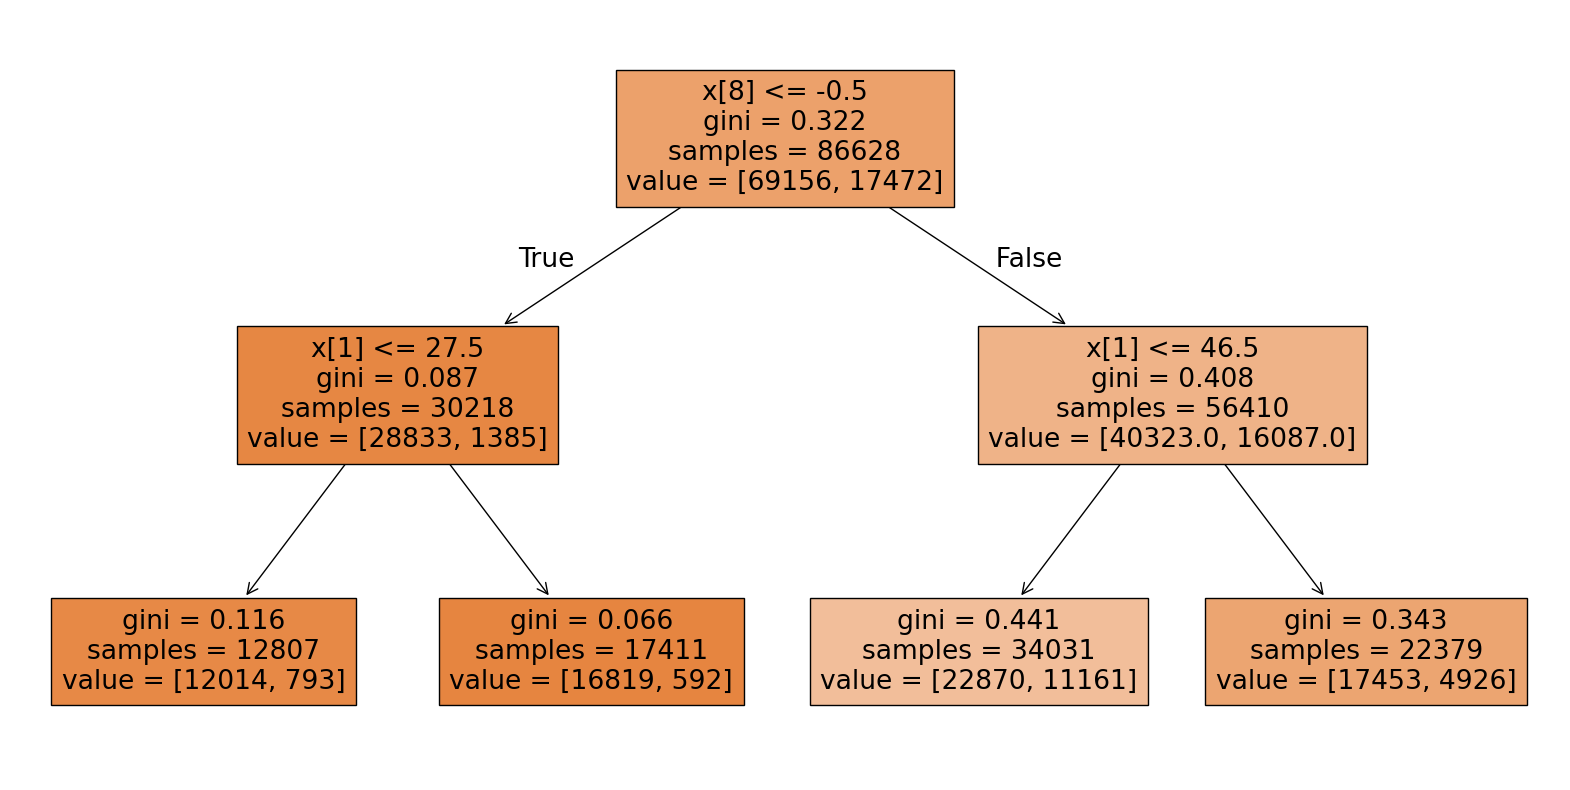

In [132]:
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True)
plt.show()



LOGISTIC REGRESSION

In [133]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=10000, random_state=0)
clf.fit(X_train, y_train)

acc = accuracy_score(y_test, clf.predict(X_test)) * 100
print(f"Logistic Regression model accuracy: {acc:.2f}%")

Logistic Regression model accuracy: 79.32%


RANDOM FOREST

In [134]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [135]:
print(accuracy)
print(classification_rep)

0.7635977467910241
              precision    recall  f1-score   support

           0       0.82      0.90      0.86     17218
           1       0.38      0.24      0.29      4440

    accuracy                           0.76     21658
   macro avg       0.60      0.57      0.58     21658
weighted avg       0.73      0.76      0.74     21658



XGBOOST


In [137]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


# Create and fit the model
model = XGBClassifier(n_estimators=100, learning_rate=0.1)
model.fit(X_train, y_train)

# Make predictions and evaluate
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7950872656755009
